<style type="text/css">
.time_spent {
    width: 3em;
    border-style: none;
    background-color: silver;
    font-weight: bold;
    padding-left: 5px;
}
</style>

# [WS14/15] Mathematics for Robotics and Control: Assignment 004 - Matrix decomposition

First we will setup this notebook so that figures and plots can be shown in the notebook page.

In [ ]:
#team sai kiran and sabeeh

In [1]:
try:
    shell = get_ipython()
    shell.enable_pylab("inline")
except NameError:
    pass

import numpy
import matplotlib
from matplotlib import pylab, mlab, pyplot
np = numpy
plt = pyplot
            
from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs
import IPython
from pylab import *
from numpy import *

---

**Hint**: Before you start solving the assignment, you might want to check the following *numpy* functions:

```
numpy.linalg.svd
```

## Covariance matrix properties

Write a mathematically sound proof for each of the following properties of the covariance matrix:

1) That for a given matrix $X_{m\times n}$, where $n$ is the number of observations and $m$ is the number of variables, the expression

$\frac{1}{N-1} \sum(x_{ij}-\bar{x}_j)(x_{ik}-\bar{x}_k)$

yields the covariance matrix.

2) Under which conditions taking does the eigendecomposition of a matrix yield an orthonormal basis, and for which vector space.

3) When applying Principal Components Analysis, each eigenvector points into the direction of one the dataset's principal components and how much do the component contribute to the overall variance is related to each eigenvector's eigenvalue.

## Fitting lines to point clouds

Read [this article about least squares fitting](http://mathworld.wolfram.com/LeastSquaresFitting.html). Read this [lecture about linear least squares and matrix decompositions](http://classes.soe.ucsc.edu/cmps290c/Spring04/paps/lls.pdf). **For all of the following fitting tasks, use a singular value decomposition to fit a pair of lines to each of the given point clouds.**

### Detecting a hallway

The robot is driving in a hallway when it starts its Kinect obtaining the following ploint cloud.

In [4]:
import IPython
IPython.core.display.Image("images/hallway.png", embed=True)

In [2]:
# a common clsq() which would be used in all the cases 

def clsq(A,dim):
    m, p = A.shape
    if p < dim + 1:
        print "not enough unknowns"
    if m < dim:
        print "not enough equations"
    m = np.minimum(m,p)
    Not,R  = np.linalg.qr(A)
    R1 = R[p-dim:m, p-dim:p] 
    U,S,V = np.linalg.svd(R1,full_matrices=False)
    n = np.array(V[:,dim-1]).reshape(2,1)
    a = np.dot(R1,n)
    c = np.dot(np.linalg.inv(R1),a)
    return c,n

Your task is to fit a pair lines based on the points generated by the robot's Kinect.

In [3]:
def compute_parallel_lines(first_line, second_line):
    p1 = first_line
    p2 = second_line
    sizep1toappend, sizep1columns = p1.shape
    sizep2toappend, sizep2columns = p2.shape
    onesp1 = np.ones((sizep1toappend,1))
    zerosp1 = np.zeros((sizep1toappend,1))
    onesp2  = np.ones((sizep2toappend,1))
    zerosp2 = np.zeros((sizep2toappend,1))
    completep1 = np.hstack((onesp1,zerosp1,p1))
    completep2 = np.hstack((zerosp2,onesp2,p2))
    A = np.vstack((completep1,completep2))
    dim = 2 #change the dimensions accordingly default value 2 for this data
    c,n = clsq(A,dim)
    size,j = n.shape
    check = 0
    for i in range(0,size):
        check = n[i]*n[i]+check
    if check ==1:
        print "lines fitting done"
        
    return c,n 
    
    raise NotImplementedError()

### Detecting a corner

At the end of the hallway the robot detects a dramatic change in the point cloud.

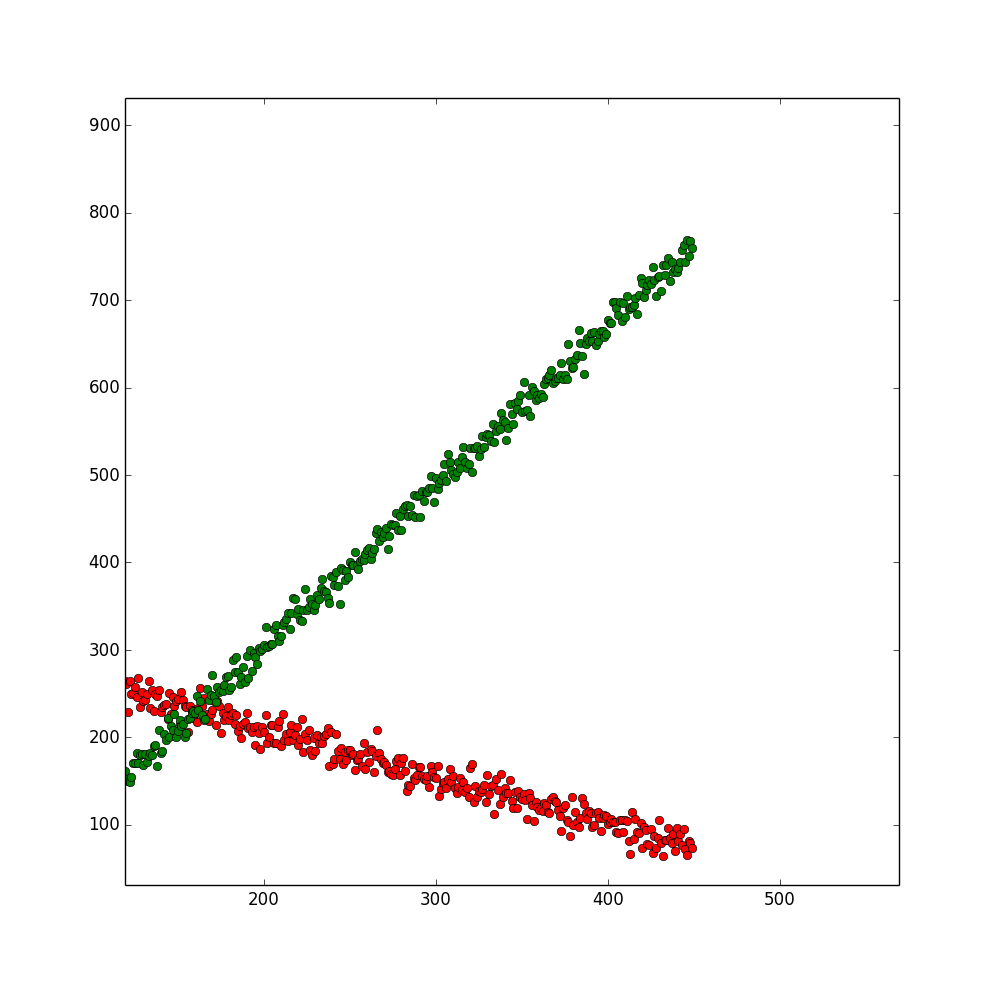

In [3]:
import IPython
IPython.core.display.Image("images/corner.png", embed=True)

Your task is to fit a pair lines based on the points generated by the robot's Kinect.

In [4]:
def compute_perpendicular_lines(first_line, second_line):
    q1 = first_line
    q2 = second_line
    sizeq1toappend, sizeq1columns = q1.shape
    sizeq2toappend, sizeq2columns = q2.shape
    onesq1 = np.ones((sizeq1toappend,1))
    zerosq1 = np.zeros((sizeq1toappend,1))
    onesq2  = np.ones((sizeq2toappend,1))
    zerosq2 = np.zeros((sizeq2toappend,1))
    completeq1 = np.hstack((onesq1,zerosq1,q1))
    toinvertq2_1 = np.array(q2[:,0]*-1).reshape(sizeq2toappend,1)
    toinvertq2_2 = np.array(q2[:,1]).reshape(sizeq2toappend,1)
    completeq2 = np.hstack((zerosq2,onesq2,toinvertq2_2, toinvertq2_1))
    A = np.vstack((completeq1,completeq2))
    dim = 2 #change the dimensions accordingly default value 2 for this data
    c,n = clsq(A,dim)
    size,j = n.shape
    check = 0
    for i in range(0,size):
        check = n[i]*n[i]+check
    if check ==1:
        print "lines fitting done"
        
    return c,n 
    
    
    raise NotImplementedError()

### Detecting a table

When the robot turns at a table near by the point cloud it receives is the following.

In [1]:
import IPython
IPython.core.display.Image("images/rectangle.png", embed=True)

In [5]:
def compute_rectangle_lines(first_line, second_line, third_line, fourth_line):
    p1 = first_line
    q1 = second_line
    p2 = third_line
    q2 = fourth_line
    sizep1toappend, sizep1columns = p1.shape
    sizeq1toappend, sizeq1columns = q1.shape
    sizep2toappend, sizerectcolumns = p2.shape
    sizeq2toappend, sizesectcolumns = q2.shape
    onesp1 = np.ones((sizep1toappend,1))
    zerosp1 = np.zeros((sizep1toappend,1))
    onesq1 = np.ones((sizeq1toappend,1))
    zerosq1 = np.zeros((sizeq1toappend,1))
    onesp2 = np.ones((sizep2toappend,1))
    zerosp2 = np.zeros((sizep2toappend,1))
    onesq2  = np.ones((sizeq2toappend,1))
    zerosq2 = np.zeros((sizeq2toappend,1))
    toinvertq1_1 = np.array(q1[:,0]*-1).reshape(sizeq1toappend,1)
    toinvertq1_2 = np.array(q1[:,1]).reshape(sizeq1toappend,1)
    toinvertq2_1 = np.array(q2[:,0]*-1).reshape(sizeq2toappend,1)
    toinvertq2_2 = np.array(q2[:,1]).reshape(sizeq2toappend,1)
    completep1 = np.hstack((onesp1,zerosp1,zerosp1,zerosp1,p1))
    completeq1 = np.hstack((zerosq1,onesq1,zerosq1,zerosq1,toinvertq1_2, toinvertq1_1))
    completep2 = np.hstack((zerosp2,zerosp2,onesp2,zerosp2,p2))
    completeq2 = np.hstack((zerosq2,zerosq2,zerosq2,onesq2,toinvertq2_2, toinvertq2_1))
    A = np.vstack((completep1,completeq1,completep2,completeq2))
    dim = 2 #change the dimensions accordingly default value 2 for this data
    c,n = clsq(A,dim)
    size,j = n.shape
    check = 0
    for i in range(0,size):
        check = n[i]*n[i]+check
    if check ==1:
        print "lines fitting done"
        
    return c,n 
    
    raise NotImplementedError()